# DataFrames+Pandas+Numpy

1. What is the sum of the Bisons observed in the dataset?
2. How many different types of Bisons are observed in the 'Sub Population' column?


In [70]:
# code
import csv 

with open('Bison-observation-2002.csv') as infile:
    infile = csv.reader(infile, delimiter=',')
    next(infile)
    next(infile)
    sum=0
    dict={}
#Q1
    for row in infile:
        try:
            i = row[7]
            i=int(i)
            sum=sum + i
        except ValueError:
            print("Value is Missing!")
        
        j=str(row[1])
        if j not in dict:
            dict[j]=1
        else:
            dict[j]=dict[j]+1
            
#Q2
    typeC=0
    for key in dict.keys():
        typeC+=1

print("The sum of the Bisons observed: ",sum)        
print("The types of the Bisons observed: ",typeC)
  

Value is Missing!
The sum of the Bisons observed:  1560
The types of the Bisons observed:  5


3. What is the sum of the Bisons observed in the dataset?
4. How many different types of Bisons are observed in the 'Sub Population' column?

In [64]:
import pandas as pd

Bison = pd.read_csv("Bison-observation-2002.csv", skiprows=[1])
Bison

count = Bison.Count.sum() 
count = int(count)
type = Bison.drop_duplicates(['Sub Population'])
types = type['Sub Population'].count()

#Q3
print("The sum of the Bisons observed: ",count)
#Q4
print("The types of the Bisons observed: ",types)


The sum of the Bisons observed:  1560
The types of the Bisons observed:  5


The visualization packages to explore the missing values. 

Use the missingno package to explore the percentage of missing values in Bison-dataset2.csv dataset. 

5. What columns can be imputed with other values based on your observations?
6. Which columns should be omitted?
7. For the columns you find that can be imputed, write code to replace the null values.

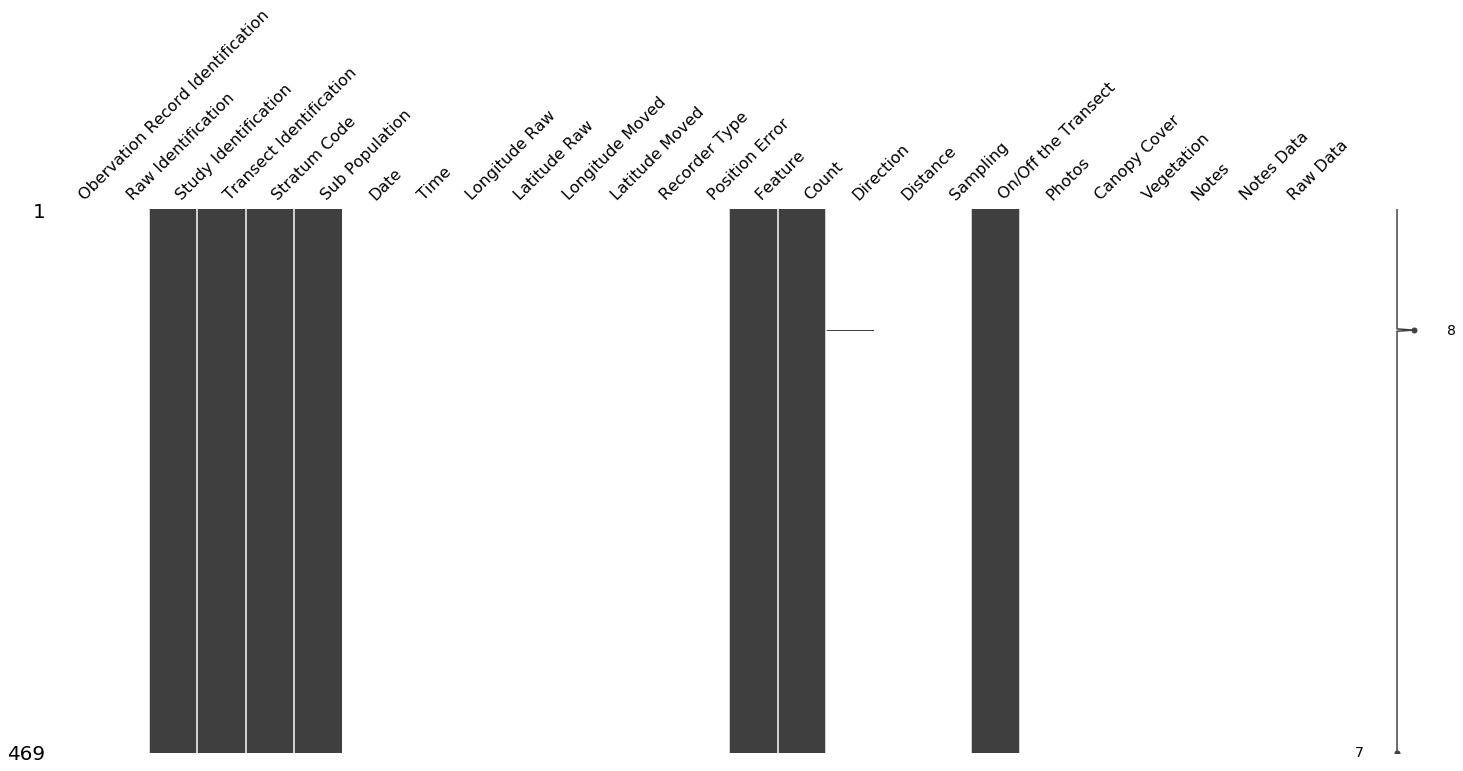

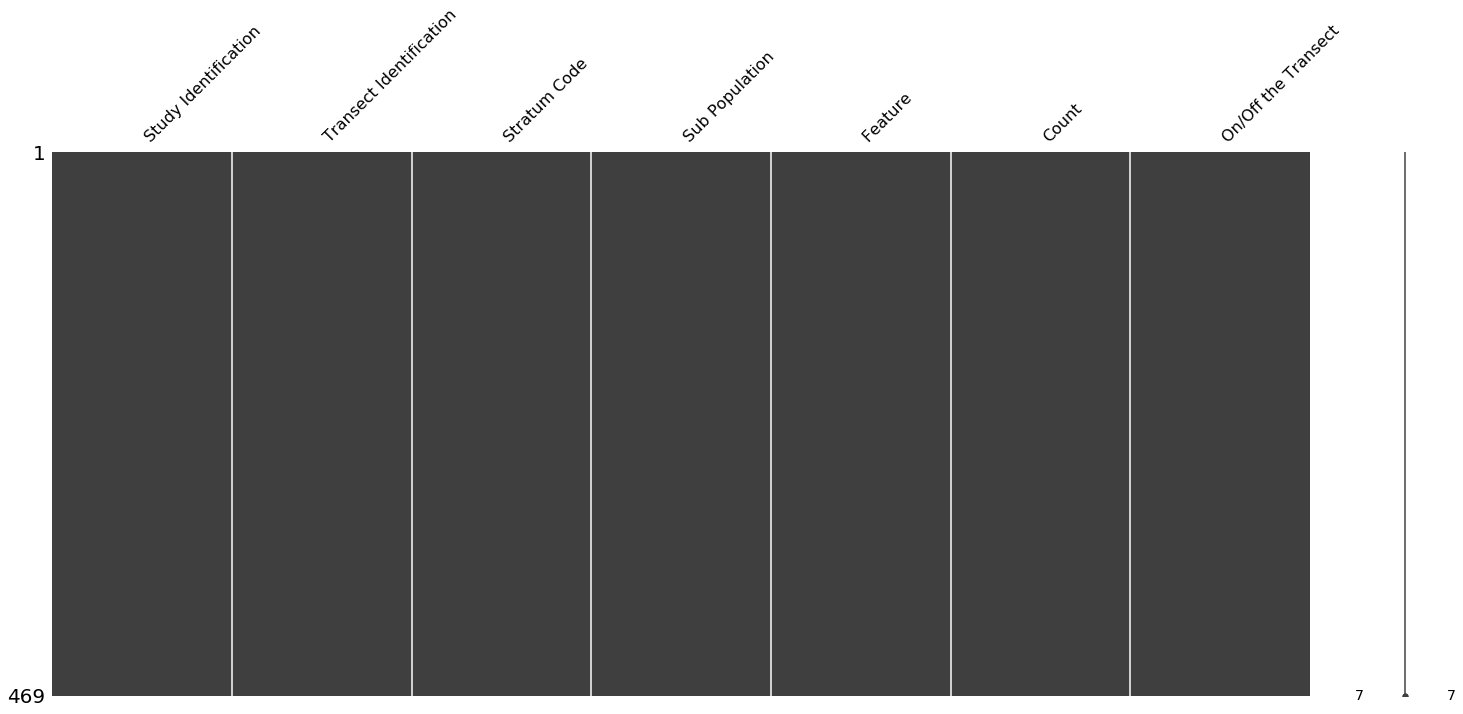

In [59]:
import pandas as pd
import numpy as np
import missingno as msno

Bison = pd.read_csv("Bison-dataset2.csv", skiprows=[1])
Bison

#Q5
#'On/Off the Transect' column can be back-filled by other values
Bison['On/Off the Transect'].fillna(method='bfill', axis=0, inplace=True)

#Assuming the missing data in 'Count' was accidentally entered in the 'Direction' column
#so, the missing value can be replaced by the value in the 'Direction' column. 
mean = Bison.Direction.mean()
Bison['Count']=Bison['Count'].replace(np.nan, mean)

#Q6
msno.matrix(Bison)
#All the columns contain NaN will be omitted. (the empty columns on the matrix)
#Date, Time, Longitude Raw, Latitude Raw, Longitude Moved, Latitude Moved, Recorder Type, Position Error
#Direction, Distance, Sampling
#Photos, Canopy Cover, Vegetation, Notes, Notes Data, Raw Data

#Q7
Bison.dropna(axis=1, how ='any',inplace=True)
Bison
msno.matrix(Bison)

8. How many different categories are there in the 'Category' column?
9. How many data records are there in each of the categories you extracted in # 8? 
10. Which data records have value 'Inactive' for 'Taxon Record Status' column?

In [63]:
import pandas as pd
import numpy as np

Species = pd.read_excel("NPSpecies_ABLI.xlsx")
Species

#8
category = Species.drop_duplicates(['Category'])
count = category.Category.count()
print("How many different categories: ",count)

#9
mammals=Species.loc[Species.Category == 'Mammal']
mammal=mammals.Category.count()
print("'Mammal' has %s columns"% mammal)

birds=Species.loc[Species.Category == 'Bird']
bird=birds.Category.count()
print("'Bird' has %s columns"% bird)

fishes=Species.loc[Species.Category == 'Fish']
fish=fishes.Category.count()
print("'Fish' has %s columns"% fish)

#10
Species.loc[Species['Taxon Record Status'] == 'Inactive']

How many different categories:  3
'Mammal' has 38 columns
'Bird' has 131 columns
'Fish' has 10 columns


,Park Code,Park Name,Category,Category Sort,Order,Family,Taxon Code,TSN,Taxon Record Status,Scientific Name,Common Names,Synonyms,Occurrence
16,ABLI,Abraham Lincoln Birthplace National Historical...,Mammal,1,Chiroptera,Vespertilionidae,695948,-756551,Inactive,Perimyotis subflavus,tri-colored bat,Pipistrellus subflavus,Present
112,ABLI,Abraham Lincoln Birthplace National Historical...,Bird,2,Passeriformes,Parulidae,168055,-505796,Inactive,Helmitheros vermivorum,worm-eating warbler,Helmitheros vermivorus,Present
119,ABLI,Abraham Lincoln Birthplace National Historical...,Bird,2,Passeriformes,Parulidae,168057,-505797,Inactive,Seiurus aurocapilla,ovenbird,Seiurus aurocapillus,Present
